# Gaussian Grid RBM Demo

### Step 1: Load all necessary modules and generate the data

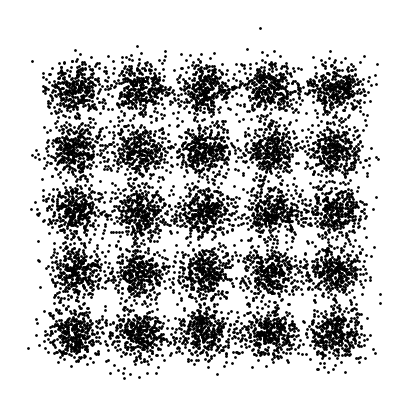

In [1]:
import os, sys
directory_path = os.path.dirname(os.path.abspath("__notebook__"))
sys.path.append('../../')
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from models import rbm_svm

def gaussian_grid(width, height, scale, n_total_samples):
    cov = np.eye(2) * scale
    samples_per_center = int(n_total_samples / (width * height))
    X = []
    for i in range(height):
        for j in range(width):
            mean = np.array([i, j])
            X.append(np.random.multivariate_normal(mean, cov, 
                                                   samples_per_center))
    final = np.vstack(X)
    final[:, 0] -= (height - 1) / 2
    final[:, 1] -= (width - 1) / 2
    return final

X = gaussian_grid(5, 5, 0.05, 10000) * 10 + 5
np.random.shuffle(X)
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_axis_off()
ax.scatter(x=X[:, 0], y=X[:, 1], s=1, c='black')

### Step 2: Train the RBM (no adversary)

In [2]:
model = rbm_svm.RBM(
    n_vis=2,
    n_hid=20,
    var=None
)
stats = model.fit(
    X=X,
    n_gibbs=10,
    lr=0.01,
    n_epochs=50,
    batch_size=100,
    gamma=0.5,
    gamma_delay=30,
    rng_seed=0,
    verbose_interval=1,
    checkpoint_path=f'{directory_path}/rbm_checkpoints/rbm_gssn_grid_demo.pth'
)

epoch: 00 of 50 | recon_mse: 80.178 | kl_data_model: 1.443 | kl_model_data: 3.263
epoch: 01 of 50 | recon_mse: 52.079 | kl_data_model: 0.586 | kl_model_data: 2.569
epoch: 02 of 50 | recon_mse: 42.039 | kl_data_model: 0.097 | kl_model_data: 1.919
epoch: 03 of 50 | recon_mse: 31.228 | kl_data_model: 0.262 | kl_model_data: 1.746
epoch: 04 of 50 | recon_mse: 26.728 | kl_data_model: 0.421 | kl_model_data: 1.237
epoch: 05 of 50 | recon_mse: 23.691 | kl_data_model: -0.012 | kl_model_data: 1.14
epoch: 06 of 50 | recon_mse: 21.985 | kl_data_model: -0.012 | kl_model_data: 1.153
epoch: 07 of 50 | recon_mse: 21.063 | kl_data_model: 0.131 | kl_model_data: 1.179
epoch: 08 of 50 | recon_mse: 18.736 | kl_data_model: 0.219 | kl_model_data: 1.015
epoch: 09 of 50 | recon_mse: 16.985 | kl_data_model: -0.358 | kl_model_data: 0.722
epoch: 10 of 50 | recon_mse: 14.955 | kl_data_model: -0.034 | kl_model_data: 0.692
epoch: 11 of 50 | recon_mse: 15.434 | kl_data_model: 0.217 | kl_model_data: 1.052
epoch: 12 of 

### Step 3: Visualize the learning process

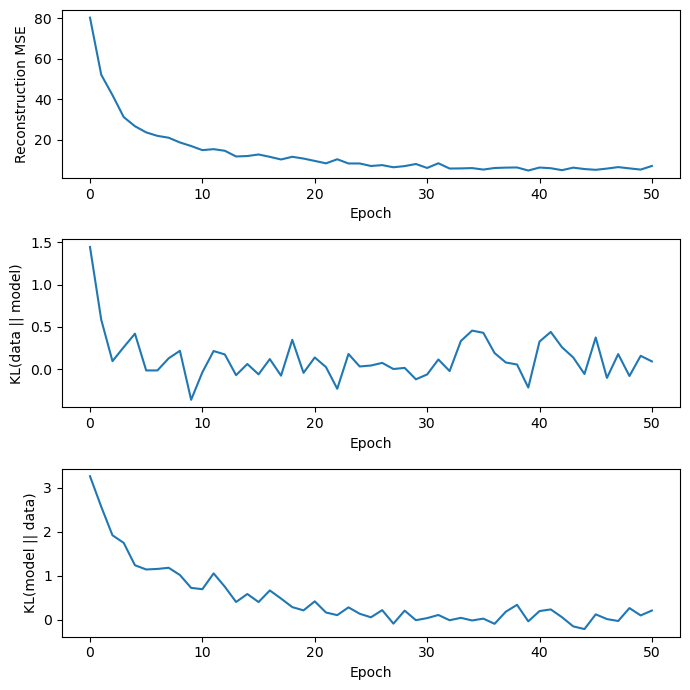

In [3]:
def visualize_learning(stats):
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(7, 7))
    axs[0].plot(stats['epoch_num'], stats['recon_mse'])
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Reconstruction MSE')
    axs[1].plot(stats['epoch_num'], stats['kl_data_model'])
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('KL(data || model)')
    axs[2].plot(stats['epoch_num'], stats['kl_model_data'])
    axs[2].set_xlabel('Epoch')
    axs[2].set_ylabel('KL(model || data)')
    plt.tight_layout()
visualize_learning(stats)


### Step 4: Visualize the learned distribution

tensor([24.1512, 24.2203], grad_fn=<ExpBackward0>)


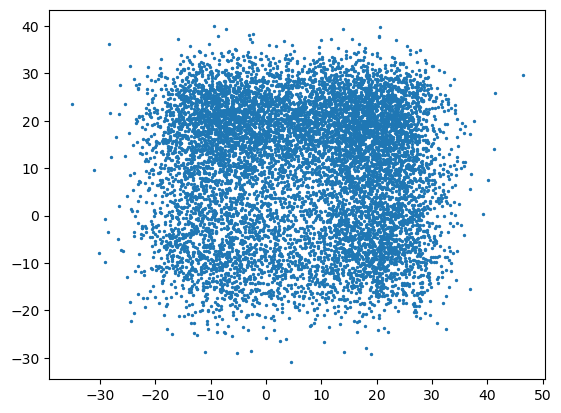

In [5]:
model = rbm_svm.load(f'{directory_path}/rbm_checkpoints/rbm_gssn_grid_demo.pth')
print(model._variance())
samples = model.reconstruct(
    np.zeros((10000, 2)), n_gibbs=100
)
img = plt.scatter(x=samples[:, 0], y=samples[:, 1], s=2)

### Repeat Step 2 for RBM with adversarial training

In [14]:
model_adversarial = rbm.RBM(
    n_vis=2,
    n_hid=20
)
stats_adv = model_adversarial.fit_autograd(
    X=X,
    n_gibbs=1,
    lr=0.01,
    n_epochs=55,
    batch_size=50,
    gamma=0.1,
    gamma_delay=20,
    rng_seed=0,
    verbose_interval=1,
    checkpoint_path=f'{directory_path}/rbm_checkpoints/rbm_gssn_grid_demo_adv.pth'
)

NameError: name 'rbm' is not defined

### Repeat Step 3 for RBM adversarial training

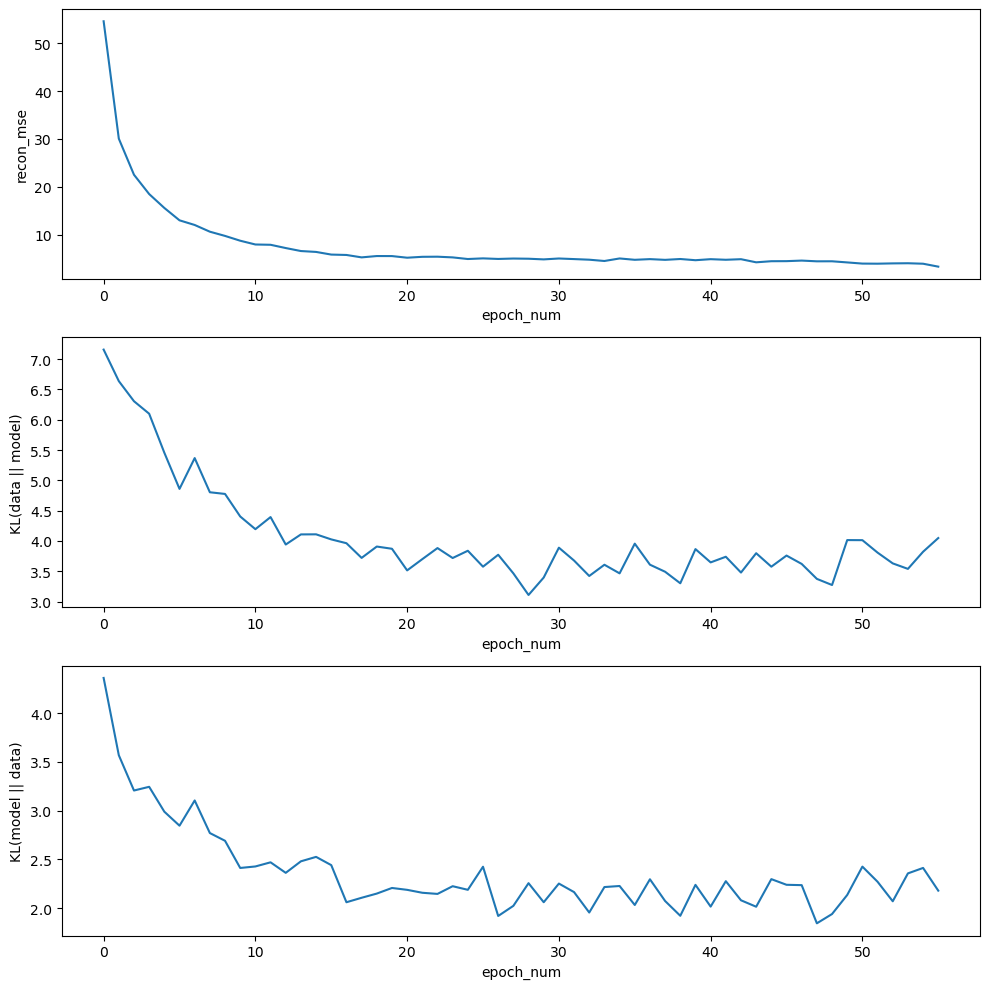

In [24]:
visualize_learning(stats_adv)

### Repeat Step 4 for RBM adversarial training

tensor([23.0545, 21.9785], grad_fn=<ExpBackward0>)


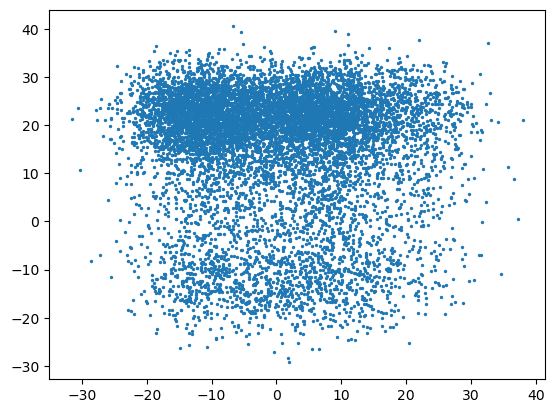

In [22]:
model = rbm.load(f'{directory_path}/rbm_checkpoints/rbm_gssn_grid_demo_adv.pth')
print(model._variance())
samples = model.reconstruct(
    np.zeros((10000, 2)), n_gibbs=200
)
img = plt.scatter(x=samples[:, 0], y=samples[:, 1], s=2)